In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.font_manager as font_manager

In [3]:
def calcCoers(df1):
    dfx = df1.iloc[100:298]
    dfx1 = dfx[dfx['y']>=0]
    min1 = dfx1['y'].min()
    dfx = df1.iloc[299:498]
    dfx2 = dfx[dfx['y']<0]
    min2 = dfx2['y'].max()
    hx1 = dfx1.loc[dfx1['y'] == min1]
    hx1V = hx1.iloc[0,0]
    hx2 = dfx2.loc[dfx2['y'] == min2]
    hx2V = hx2.iloc[0,0]
    hCoers = 0.5*(abs(hx1V)+abs(hx2V))
    return hCoers

In [4]:
# ======== GENERATING DF FOR HC VS MCS PLOT ========

for temp in range(20,101,20):
    frameName = "df" + str(temp)
    dfx = pd.DataFrame(columns=['x','y'])
    j = 1
    
    mcs = 20
    while mcs < 1001:
        filename = "temp" + str(temp) + "/mcs" + str(mcs)
        with open(filename) as file:
            mh = np.asarray([[float(num) for num in line.split('\t')] for line in file])
            df = pd.DataFrame(data=mh[0:,0:],columns=['x','y'])
            dfx.loc[j-1] = mcs, calcCoers(df)
            j=j+1
            if mcs<100:
                mcs = mcs + 20
            elif mcs < 500:
                mcs = mcs + 100
            else:
                mcs = mcs + 250
    globals()[frameName] = dfx
print(j)
df60.at[0, 'y'] = 0.31
print(df60)

12
         x      y
0     20.0  0.310
1     40.0  0.300
2     60.0  0.290
3     80.0  0.290
4    100.0  0.285
5    200.0  0.270
6    300.0  0.270
7    400.0  0.270
8    500.0  0.260
9    750.0  0.260
10  1000.0  0.250


In [5]:
# ======== GENERATING DF FOR HISTERESYS PLOT ========

mcs = 20
while mcs < 1001:
    filename = "temp" + str(20) + "/mcs" + str(mcs)
    frameName = "dfH" + str(mcs)
    with open(filename) as file:
        mh = np.asarray([[float(num) for num in line.split('\t')] for line in file])
        df = pd.DataFrame(data=mh[0:,0:],columns=['x','y'])
        if mcs<100:
            mcs = mcs + 20
        elif mcs <500:
            mcs = mcs + 100
        else:
            mcs = mcs + 250
    globals()[frameName] = df

/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  del sys.path[0]
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three ar

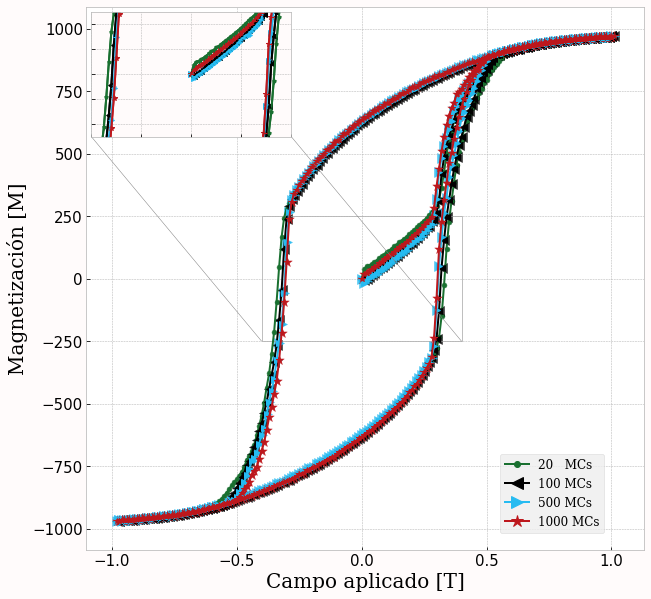

In [6]:
# PLOTTING HYSTERESIS LOOP
plt.style.use("bmh")
ax = dfH20.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#197030', marker='.', s=100)  
dfH100.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='k', marker='<', s=100, ax=ax)
dfH500.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#26BBF1', marker='>', s=100, ax=ax)
dfH1000.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#BD171C', marker='*', s=100, ax=ax)

#ax.set_title('M(H) Curve', size="xx-large", family="serif", weight= "semibold")
plt.xlabel('Campo aplicado [T]', fontsize= 20, color="#000000", family="serif")
plt.ylabel('Magnetización [M]', fontsize= 20, color="#000000", family="serif")

plt.plot( 'x', 'y', data=dfH20, linestyle='-', marker='.', color='#197030', label="20   MCs")
plt.plot( 'x', 'y', data=dfH100, linestyle='-', marker='<', color='k', label="100 MCs")
plt.plot( 'x', 'y', data=dfH500, linestyle='-', marker='>', color='#26BBF1', label="500 MCs")
plt.plot( 'x', 'y', data=dfH1000, linestyle='-', marker='*', color='#BD171C', label="1000 MCs")
plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1000,1000.1,250))

font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
ax.legend(bbox_to_anchor=(0.95, 0.20), loc=0, borderaxespad=1, prop=font, markerscale=2)
#======================= ZOOM 1 ========================
axins = zoomed_inset_axes(ax, 1, loc=2)
axins.plot(dfH20['x'],dfH20['y'], linestyle='-', marker=".", c="#197030")
axins.plot(dfH100['x'],dfH100['y'], linestyle='-', marker="<", c="k")
axins.plot(dfH300['x'],dfH500['y'], linestyle='-', marker=">", c="#26BBF1")
axins.plot(dfH1000['x'],dfH1000['y'], linestyle='-', marker="*", c="#BD171C")
axins.set_xlim(-0.4, 0.4)
axins.set_ylim(-250, 250)
plt.yticks(visible=False)
plt.xticks(visible=False)
axins.set_facecolor('#FFFBFB')
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

plt.plot( 'x', 'y', data=dfH20, linestyle='-', marker='1', color='#197030')
plt.plot( 'x', 'y', data=dfH100, linestyle='-', marker='2', color='k')
plt.plot( 'x', 'y', data=dfH500, linestyle='-', marker='3', color='#26BBF1')
plt.plot( 'x', 'y', data=dfH1000, linestyle='-', marker='4', color='#BD171C')

ax.set_facecolor('#FFFFFF')
plt.gcf().set_facecolor('#FFFBFB')
ax.tick_params(labelsize=15)
plt.savefig('mcsHyst.svg', transparent=True)

#Plot
plt.show()

/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a

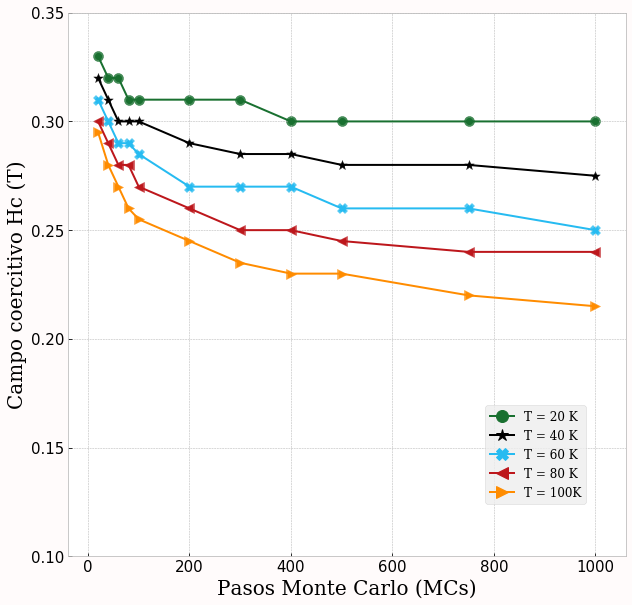

In [7]:
plt.style.use("bmh")
ax = df20.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#197030', marker='o', s=100)  
df40.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='k', marker='*', ax=ax, s=100)  
df60.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#26BBF1', marker='X', ax=ax, s=100)  
df80.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#BD171C', marker='<', ax=ax, s=100)  
df100.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='darkorange', marker='>', ax=ax, s=100)  

#plt.xticks(np.arange(0,501,step=100))

plt.plot( 'x', 'y', data=df20, linestyle='-', marker='o', color='#197030', label='T = 20 K')
plt.plot( 'x', 'y', data=df40, linestyle='-', marker='*', color='k', label='T = 40 K')
plt.plot( 'x', 'y', data=df60, linestyle='-', marker='X', color='#26BBF1', label='T = 60 K')
plt.plot( 'x', 'y', data=df80, linestyle='-', marker='<', color='#BD171C', label='T = 80 K')
plt.plot( 'x', 'y', data=df100, linestyle='-', marker='>', color='darkorange', label='T = 100K')
ax.legend(bbox_to_anchor=(0.95, 0.30), loc=0, borderaxespad=1, prop=font, markerscale=2)

plt.xlabel('Pasos Monte Carlo (MCs)', fontsize= 20, color="#000000", family="serif")
plt.ylabel('Campo coercitivo Hc (T)', fontsize= 20, color="#000000", family="serif")

ax.set_facecolor('#FFFFFF')
plt.gcf().set_facecolor('#FFFBFB')

axes = plt.gca()
axes.set_ylim([0.1,0.35])
ax.tick_params(labelsize=15)
plt.savefig('mcs.svg', transparent=True)

plt.show()